# Exercise 1.3.1: Clustering

Objective: Find the optimal number of clusters and the best separation method.

---

## Final Recommendation

Recommended number of clusters: **6**

Preferred method (Raw or Standardized): **Standardized**

---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data_path = '../../data/clustering/data.npy'
X = np.load(data_path)

print(f"Données chargées : {X.shape[0]} clients, {X.shape[1]} caractéristiques (dimensions).")

Données chargées : 1200 clients, 4 caractéristiques (dimensions).
Aperçu des 5 premiers clients :
 [[662.26157739  54.39554155 -20.58877384 -37.70065046]
 [511.08919164 -11.03233535  12.51769259 -42.68558446]
 [706.60338096  -1.4823591   38.62350678  32.24961523]
 [649.02648324 -18.99984551  33.09514155 -23.82702659]
 [666.5217107   84.3311828  -32.25465262 138.89855417]]


## Méthode 1 : K-Means on Raw Data

Group points by minimizing the distance within each cluster.

To choose the optimal number of clusters (k), use two indicators:
1. **Elbow Method**: Find the point where adding a cluster stops significantly improving compactness (the "elbow" of the curve).
2. **Silhouette Score**: Measures if a point fits its cluster well and remains far from others. Scores closer to 1 are better.

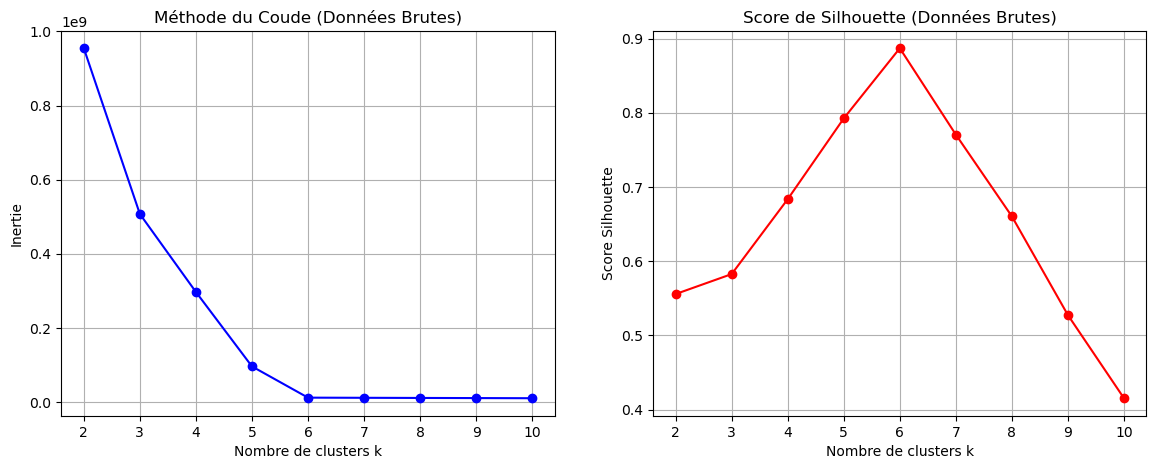

In [5]:
# Plages de k à tester (de 2 à 10 groupes)
K_range = range(2, 11)

inertias_raw = []
silhouettes_raw = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)

    # On stocke l'inertie (pour le Coude)
    inertias_raw.append(kmeans.inertia_)

    # On stocke le score silhouette
    silhouettes_raw.append(silhouette_score(X, kmeans.labels_))

# --- Affichage des graphiques ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique de l'Inertie (Coude)
ax1.plot(K_range, inertias_raw, 'bo-', label='Inertie')
ax1.set_title('Méthode du Coude (Données Brutes)')
ax1.set_xlabel('Nombre de clusters k')
ax1.set_ylabel('Inertie')
ax1.grid(True)

# Graphique de la Silhouette
ax2.plot(K_range, silhouettes_raw, 'ro-', label='Silhouette')
ax2.set_title('Score de Silhouette (Données Brutes)')
ax2.set_xlabel('Nombre de clusters k')
ax2.set_ylabel('Score Silhouette')
ax2.grid(True)

plt.show()

## Méthode 2 : K-Means on Standardized Data

Large value ranges (annual salary) vs. small ranges (age) cause Euclidean distance to overweight high-magnitude features.

Standardize data (Mean = 0, Standard Deviation = 1) to equalize feature importance. This adjusts the distance metric to treat all dimensions uniformly.

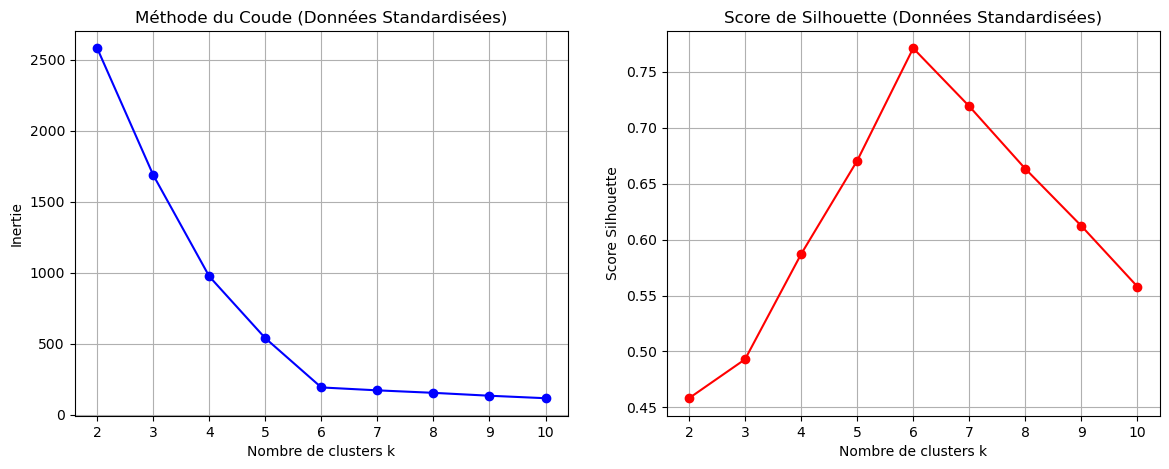

In [6]:
# 1. Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias_scaled = []
silhouettes_scaled = []

for k in K_range:
    # KMeans sur données mises à l'échelle
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    inertias_scaled.append(kmeans.inertia_)
    silhouettes_scaled.append(silhouette_score(X_scaled, kmeans.labels_))

# --- Affichage des graphiques ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique de l'Inertie (Coude)
ax1.plot(K_range, inertias_scaled, 'bo-', label='Inertie')
ax1.set_title('Méthode du Coude (Données Standardisées)')
ax1.set_xlabel('Nombre de clusters k')
ax1.set_ylabel('Inertie')
ax1.grid(True)

# Graphique de la Silhouette
ax2.plot(K_range, silhouettes_scaled, 'ro-', label='Silhouette')
ax2.set_title('Score de Silhouette (Données Standardisées)')
ax2.set_xlabel('Nombre de clusters k')
ax2.set_ylabel('Score Silhouette')
ax2.grid(True)

plt.show()